#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y
X = data[:, 0:2]  # First column
y = data[:, 2:]  # Second column

print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i,0].item():.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


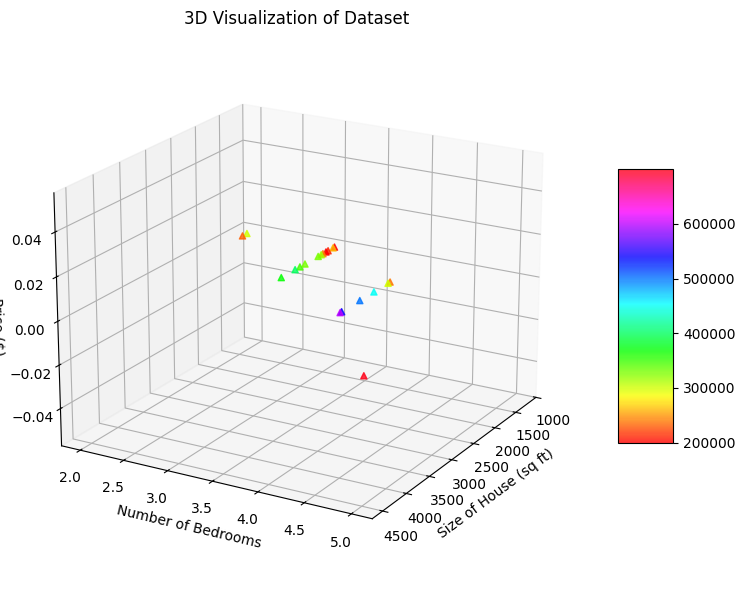

In [ ]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [ ]:

X = data[:, 0:2]
def featureNormalize(X):

     X = X.astype(float)
     mu = np.mean(X, axis=0)
     sigma = np.std(X, axis=0, ddof=1)
     X_norm = (X - mu) / sigma

     return X_norm, mu, sigma

[X,mu, sigma] = featureNormalize(X)
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')
print(X.shape)

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]
First 10 examples from the dataset:
x = [0.1300 -0.2237]
x = [-0.5042 -0.2237]
x = [0.5025 -0.2237]
x = [-0.7357 -1.5378]
x = [1.2575 1.0904]
x = [-0.0197 1.0904]
x = [-0.5872 -0.2237]
x = [-0.7219 -0.2237]
x = [-0.7810 -0.2237]
x = [-0.6376 -0.2237]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function:
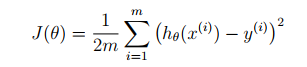

where the hypothesis h is given by

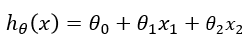




In [ ]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    m = len(y)
    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)
    h = X @ theta  # Hypothesis function
    J = np.sum((h - y)**2) / (2 * m) # Cost function

    return J

m = data.shape[0]
X = data[:, 0:2]
[X,mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
print(X[0:5,:])
theta = np.zeros((3, 1))
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")


[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: 65591548106.45744


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

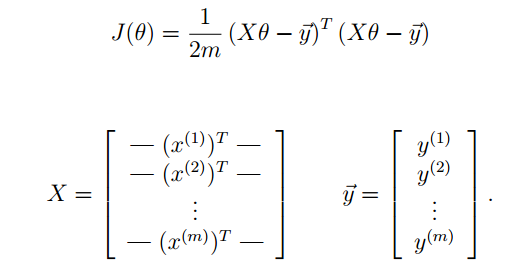

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

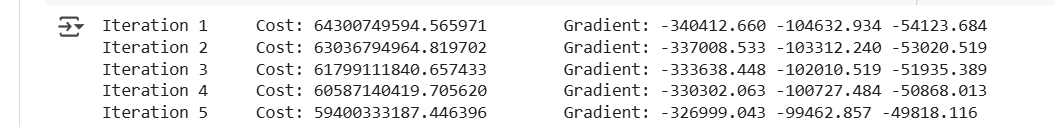

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 3
theta = np.zeros((3, 1))
alpha = 0.01

def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y)  # number of training examples
  J_history = np.zeros(iterations)

  for iter in range(iterations):

      h = X @ theta - y
      grad_J = (1/m) * X.T @ h
      theta = theta - alpha * grad_J

      J_history[iter] = cost_function(theta,X, y)
      print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J.ravel()}")
  return theta, J_history

theta, j_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
print(normalized_features)
# Add the bias term (1) as the first element
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a profit of ${(predict1 * 10000).item():.2f}')




Iteration 1	Cost: 64300749594.565971	Gradient: [-340412.65957447 -104632.93376618  -54123.68384408]
Iteration 2	Cost: 63036794964.819687	Gradient: [-337008.53297872 -103312.24027723  -53020.51874166]
Iteration 3	Cost: 61799111840.657433	Gradient: [-333638.44764894 -102010.51865409  -51935.38867469]
Theta found by gradient descent:  [10110.59640202  3099.55692698  1590.7959126 ]
[-0.00085674 -0.22367519]
For a house with 2000 sqft and 3 bedrooms, we predict a profit of $97521193.23


# Visualization

#Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

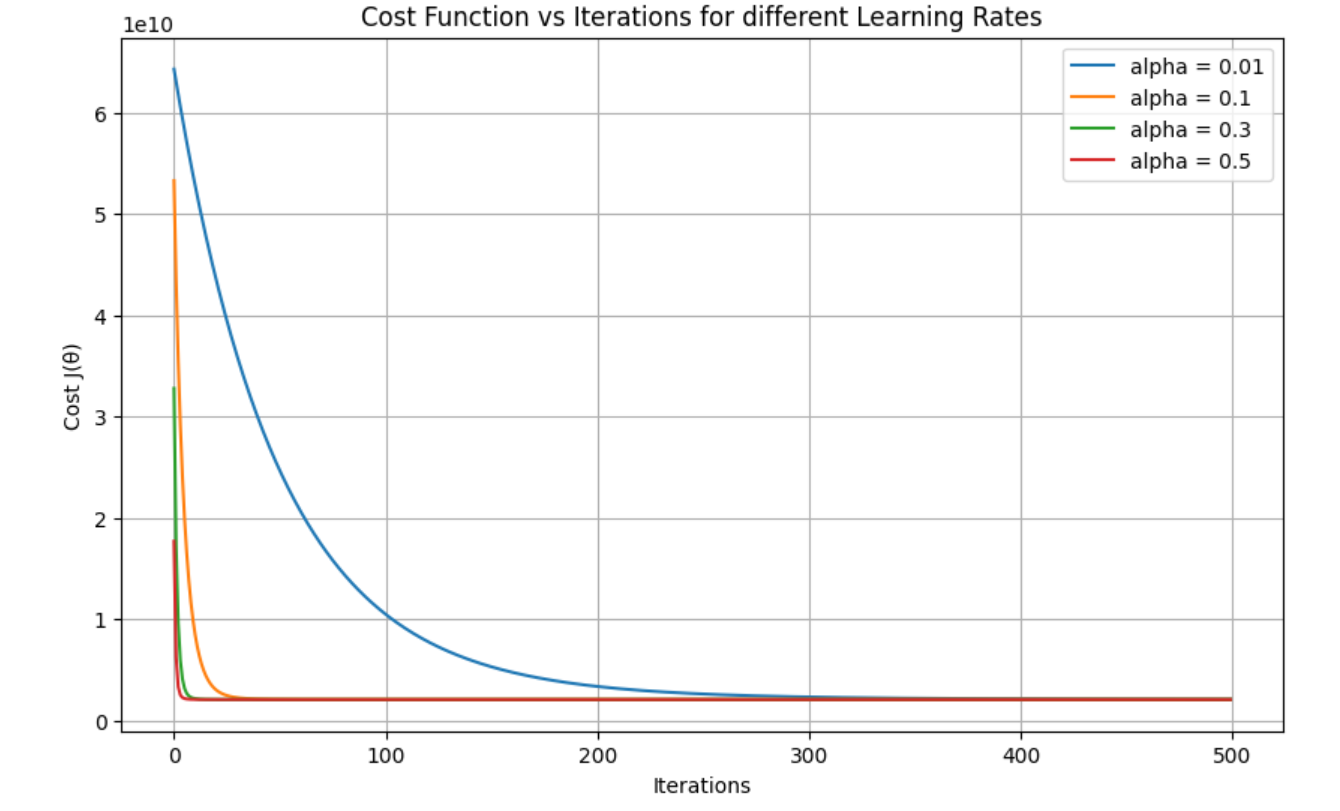

Iteration 1	Cost: 64300749594.565971	Gradient: [-340412.65957447 -104632.93376618  -54123.68384408]
Iteration 2	Cost: 63036794964.819687	Gradient: [-337008.53297872 -103312.24027723  -53020.51874166]
Iteration 3	Cost: 61799111840.657433	Gradient: [-333638.44764894 -102010.51865409  -51935.38867469]
Iteration 4	Cost: 60587140419.705620	Gradient: [-330302.06317245 -100727.48437312  -50868.01315417]
Iteration 5	Cost: 59400333187.446396	Gradient: [-326999.04254072  -99462.85723258  -49818.11599565]
Iteration 6	Cost: 58238154637.679718	Gradient: [-323729.05211532  -98216.36128681  -48785.42525344]
Iteration 7	Cost: 57100080999.611237	Gradient: [-320491.76159416  -96987.72478128  -47769.67315575]
Iteration 8	Cost: 55985599971.401474	Gradient: [-317286.84397822  -95776.68008871  -46770.5960409 ]
Iteration 9	Cost: 54894210460.017029	Gradient: [-314113.97553844  -94582.96364617  -45787.93429447]
Iteration 10	Cost: 53825422327.227730	Gradient: [-310972.83578305  -93406.31589309  -44821.43228741]

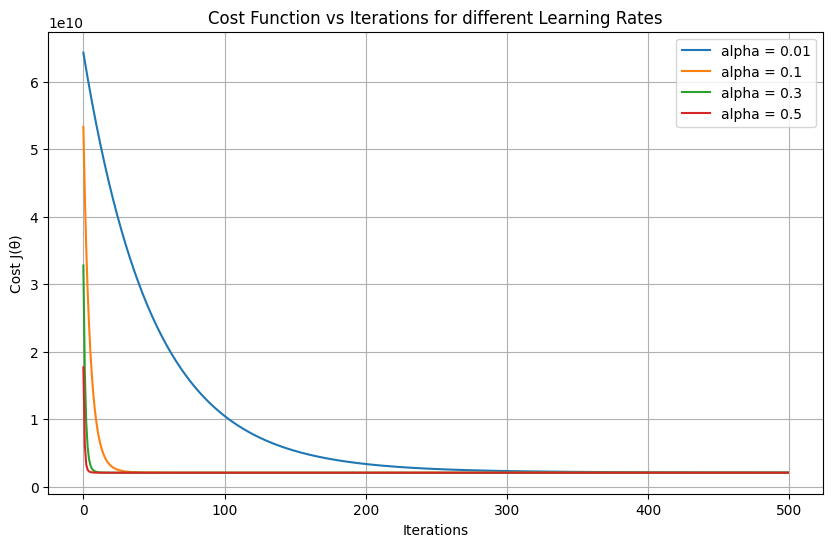

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 500
theta = np.zeros((3, 1))
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])
matrix_J = np.zeros((iterations, len(alpha_vector)))

for i, alpha in enumerate(alpha_vector):
    theta = np.zeros((3, 1))
    theta, J_hist = gradientDescent(X, y, theta, alpha, iterations)
    matrix_J[:, i] = J_hist  # Guardar la evolución del coste para ese alpha

# 8. Graficar los resultados
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_vector):
    plt.plot(range(iterations), matrix_J[:, i], label=f'alpha = {alpha}')
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iterations for different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()



# Coffee Health Dataset
Implement a linear regression model to predict sleep hours using both gradient descent and the normal equation.

Goal: Implement a linear regression model to predict sleep hours using both gradient descent and the normal equation, and reflect on the role of different **float** predictors.

In [ ]:
from google.colab import files
uploaded = files.upload()
!ls

Saving Coffee_health_data.csv to Coffee_health_data.csv
Coffee_health_data.csv	sample_data


In [ ]:
#import numpy as np
# Cargar CSV ignorando la primera fila (encabezados)
#data = np.genfromtxt('Coffee_health_data.csv', delimiter=',', skip_header=1)
#print(data.shape)    # dimensiones de la matriz
#print(data[:5])

import pandas as pd
df = pd.read_csv('Coffee_health_data.csv')
print(df.shape)       # dimensiones (10000, 16)
print(df.head())      # primeras filas
print(df.dtypes)



(10000, 16)
   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0           NaN      Other        0          

# Visualize the dataset



*   Load the GlobalCoffeeHealth.csv file into a DataFrame.
*   Explore the float variables available:

Coffee_Intake

Caffeine_mg

BMI

Physical_Activity_Hours

(Sleep_Hours will be your target variable).



* Create scatter plots (each predictor vs. Sleep_Hours) to observe potential relationships.

* Discuss: Do all predictors appear relevant?

       Coffee_Intake   Caffeine_mg           BMI  Physical_Activity_Hours  \
count   10000.000000  10000.000000  10000.000000              10000.00000   
mean        2.509230    238.411010     23.986860                  7.48704   
std         1.450248    137.748815      3.906411                  4.31518   
min         0.000000      0.000000     15.000000                  0.00000   
25%         1.500000    138.750000     21.300000                  3.70000   
50%         2.500000    235.400000     24.000000                  7.50000   
75%         3.500000    332.025000     26.600000                 11.20000   
max         8.200000    780.300000     38.200000                 15.00000   

        Sleep_Hours  
count  10000.000000  
mean       6.636220  
std        1.222055  
min        3.000000  
25%        5.800000  
50%        6.600000  
75%        7.500000  
max       10.000000  


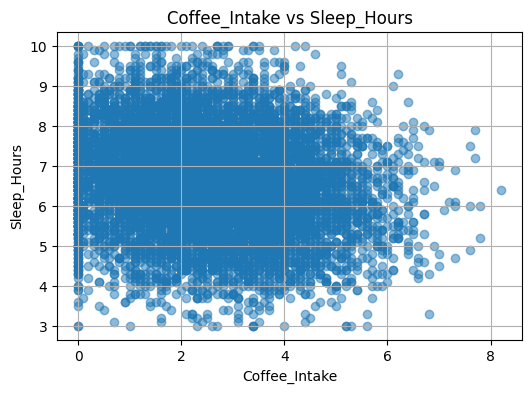

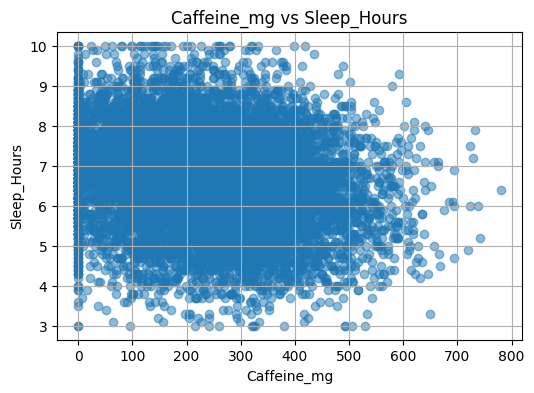

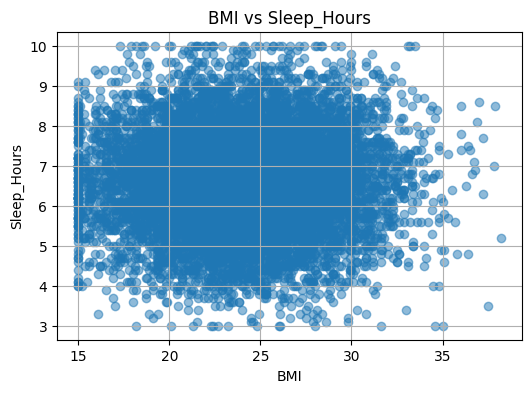

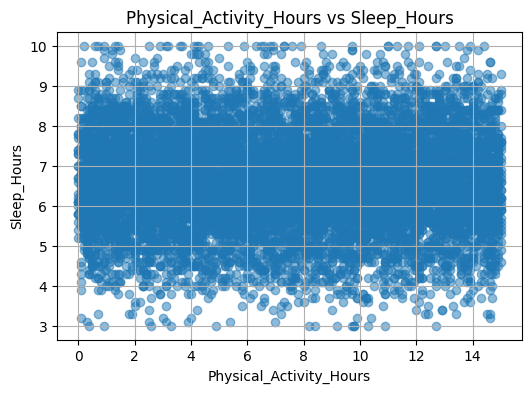

In [ ]:
# Variables predictoras (float) y target
predictors = ["Coffee_Intake", "Caffeine_mg", "BMI", "Physical_Activity_Hours"]
target = "Sleep_Hours"

print(df[predictors + [target]].describe())

# Graficar cada predictor contra Sleep_Hours
for col in predictors:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")
    plt.grid(True)
    plt.show()


#Implement gradient descent (multivariable case)


*   Initialize parameters (theta vector).

*   Define a learning rate (α).

*  Implement the cost function for multiple features.

*   Apply gradientDescent to iteratively update parameters until convergence.

In [119]:
X = df[["Coffee_Intake", "Caffeine_mg", "BMI", "Physical_Activity_Hours"]].values
y = df["Sleep_Hours"].values
m = len(y)

# Normalizar
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.concatenate([np.ones((m,1)), X], axis=1)
y = y.reshape(m,1)

# Inicialización
theta = np.zeros((X.shape[1],1))
alpha = 0.01
iterations = 1500

# Entrenamiento
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

print("Theta final:\n", theta)
print("Costo final:", J_history[-1])

Iteration 1	Cost: 22.327076	Gradient: [-6.63622     0.2325342   0.23278144 -0.0103417   0.0137203 ]
Iteration 2	Cost: 21.896572	Gradient: [-6.5698578   0.22787996  0.22812712 -0.01019893  0.01356049]
Iteration 3	Cost: 21.474655	Gradient: [-6.50415922  0.22331882  0.22356591 -0.01005838  0.01340273]
Iteration 4	Cost: 21.061153	Gradient: [-6.43911763  0.21884891  0.21909593 -0.00992     0.01324699]
Iteration 5	Cost: 20.655899	Gradient: [-6.37472645  0.21446841  0.21471536 -0.00978376  0.01309325]
Iteration 6	Cost: 20.258728	Gradient: [-6.31097919  0.21017553  0.21042241 -0.00964963  0.01294147]
Iteration 7	Cost: 19.869478	Gradient: [-6.2478694   0.20596852  0.20621533 -0.00951758  0.01279163]
Iteration 8	Cost: 19.487990	Gradient: [-6.1853907   0.20184566  0.20209241 -0.00938755  0.0126437 ]
Iteration 9	Cost: 19.114110	Gradient: [-6.1235368   0.19780527  0.19805195 -0.00925952  0.01249764]
Iteration 10	Cost: 18.747685	Gradient: [-6.06230143  0.1938457   0.19409231 -0.00913346  0.01235344]

# Prediction with the model

Choose values for the predictors (e.g., Coffee_Intake = 3 cups, BMI = 25, Physical_Activity_Hours = 5).

Use your model to estimate the expected sleep hours.

In [124]:
# Valores de prueba
test_values = np.array([3, 200, 25, 5])  # Coffee_Intake, Caffeine_mg, BMI, Physical_Activity_Hours

# Normalizar usando la media y desviación del dataset original
mean_vals = np.mean(df[["Coffee_Intake", "Caffeine_mg", "BMI", "Physical_Activity_Hours"]].values, axis=0)
std_vals = np.std(df[["Coffee_Intake", "Caffeine_mg", "BMI", "Physical_Activity_Hours"]].values, axis=0)
test_values = (test_values - mean_vals) / std_vals

# Agregar bias (1 en la primera posición)
test_values = np.insert(test_values, 0, 1)

# Predicción
prediction = test_values @ theta
print("Predicted Sleep Hours:", prediction[0])


Predicted Sleep Hours: 6.639844410687848


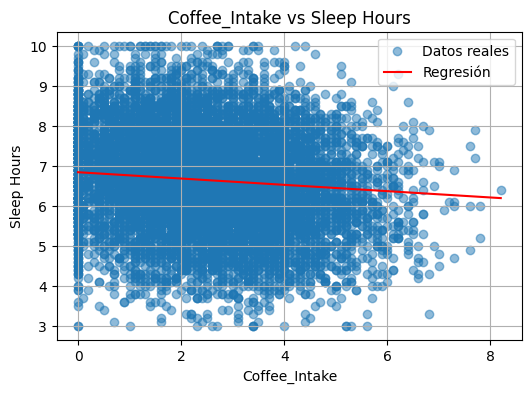

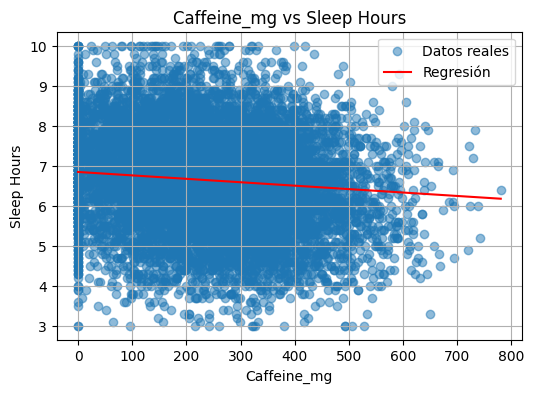

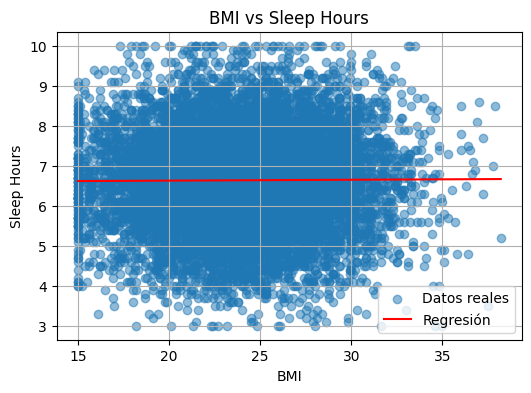

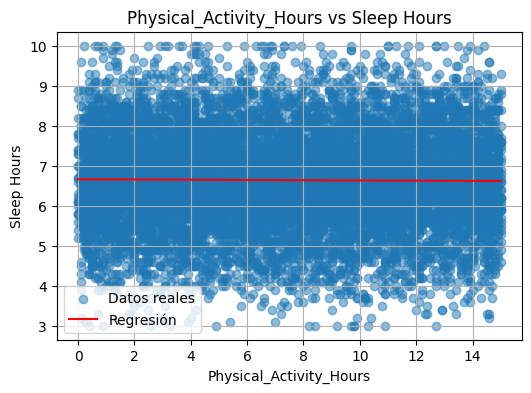

In [121]:
import matplotlib.pyplot as plt

# Lista de predictores
features = ["Coffee_Intake", "Caffeine_mg", "BMI", "Physical_Activity_Hours"]

# Valores de media y desviación para normalizar (como en el modelo)
mean_vals = np.mean(df[features].values, axis=0)
std_vals = np.std(df[features].values, axis=0)

# Recorremos cada predictor
for i, feature in enumerate(features):
    plt.figure(figsize=(6, 4))

    # Datos originales
    plt.scatter(df[feature], df["Sleep_Hours"], alpha=0.5, label="Datos reales")

    # Rango de valores para el predictor actual
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100)

    # Construir X_test (normalizado)
    X_test = np.zeros((100, len(features)))
    X_test[:, i] = (x_range - mean_vals[i]) / std_vals[i]  # solo cambia el predictor actual

    # Agregar bias
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Predicciones
    y_pred = X_test @ theta

    # Dibujar la línea de regresión
    plt.plot(x_range, y_pred, color="red", label="Regresión")

    plt.xlabel(feature)
    plt.ylabel("Sleep Hours")
    plt.title(f"{feature} vs Sleep Hours")
    plt.legend()
    plt.grid(True)
    plt.show()



#Reflection

* Which predictors did you include? Why?

* Does including all float variables improve prediction, or does it introduce redundancy (e.g., Coffee_Intake vs. Caffeine_mg)?

* Compare the advantages and limitations of gradient descent vs. normal equation.